In [62]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [63]:
data=pd.read_excel('Data/K.xlsx')
data.head()

,SrNo,SiteFeature,AttributeOrParameter,StationOrSiteName,PeriodOrDateofMeasurment,K,SampleSource,SampleDepth
0,0,Surface Water,K,Ambegaon,2011-07-20 13:45:00,1.1,River,30.0
1,1,Surface Water,K,Ambegaon,2011-09-19 15:10:00,1.2,River,30.0
2,2,Surface Water,K,Ambegaon,2011-10-12 14:30:00,2.1,River,30.0
3,3,Surface Water,K,Ambegaon,2012-06-25 15:10:00,1.5,River,30.0
4,4,Surface Water,K,Ambegaon,2012-08-16 14:40:00,2.1,River,30.0


In [64]:
data.SiteFeature.unique()

array(['Surface Water'], dtype=object)

In [65]:
data.SampleDepth.unique()

array([30., nan])

In [66]:
data.StationOrSiteName.unique()

array(['Ambegaon', 'Ambeghar', 'Chaskman', 'Dattawadi', 'Daund',
       'Khadakwasla Reservoir', 'Khamgaon', 'Narsinhpur', 'Nighoje',
       'Panshet Reservoir', 'Paud', 'Pavana Reservoir', 'Pimpale Gurav',
       'Rakshewadi'], dtype=object)

In [67]:
data.SampleSource.unique()

array(['River', 'Reservoir'], dtype=object)

In [68]:
#dropping Features having only unique or same value
data.drop(['SrNo','AttributeOrParameter','SiteFeature','SampleDepth'],axis=1,inplace=True)

In [69]:
data.columns=['Station','Period','K','SampleSource']

In [70]:
data.head()

,Station,Period,K,SampleSource
0,Ambegaon,2011-07-20 13:45:00,1.1,River
1,Ambegaon,2011-09-19 15:10:00,1.2,River
2,Ambegaon,2011-10-12 14:30:00,2.1,River
3,Ambegaon,2012-06-25 15:10:00,1.5,River
4,Ambegaon,2012-08-16 14:40:00,2.1,River


In [71]:
data=data.sort_values(by=['Period'])
x=np.arange(916)
data.index=x

In [72]:
data.head(10)

,Station,Period,K,SampleSource
0,Khamgaon,2011-01-06 13:00:00,7.9,River
1,Dattawadi,2011-01-10 11:20:00,4.8,River
2,Paud,2011-01-10 13:40:00,0.2,River
3,Daund,2011-01-12 12:10:00,6.2,River
4,Narsinhpur,2011-01-15 12:00:00,4.9,River
5,Ambeghar,2011-01-18 13:15:00,2.9,River
6,Chaskman,2011-01-27 14:45:00,0.3,River
7,Pimpale Gurav,2011-01-29 13:30:00,5.9,River
8,Nighoje,2011-01-29 15:20:00,2.7,River
9,Ambeghar,2011-02-03 12:30:00,3.2,River


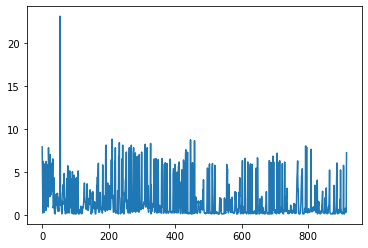

In [73]:
plt.plot(data['K'])

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 0 to 915
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Station       916 non-null    object        
 1   Period        916 non-null    datetime64[ns]
 2   K             916 non-null    float64       
 3   SampleSource  916 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 35.8+ KB


In [75]:
data.shape

(916, 4)

In [76]:
data.Station.value_counts()

Khamgaon                 118
Khadakwasla Reservoir    117
Pavana Reservoir         115
Panshet Reservoir        115
Ambeghar                 106
Paud                      75
Chaskman                  73
Daund                     68
Ambegaon                  50
Rakshewadi                36
Narsinhpur                32
Nighoje                    5
Dattawadi                  4
Pimpale Gurav              2
Name: Station, dtype: int64

In [77]:
data.replace(['Pimpale Gurav','Dattawadi','Nighoje','Narsinhpur','Rakshewadi'], 'Others',inplace=True)

In [78]:
data.head()

,Station,Period,K,SampleSource
0,Khamgaon,2011-01-06 13:00:00,7.9,River
1,Others,2011-01-10 11:20:00,4.8,River
2,Paud,2011-01-10 13:40:00,0.2,River
3,Daund,2011-01-12 12:10:00,6.2,River
4,Others,2011-01-15 12:00:00,4.9,River


In [79]:
data.Station.value_counts()

Khamgaon                 118
Khadakwasla Reservoir    117
Pavana Reservoir         115
Panshet Reservoir        115
Ambeghar                 106
Others                    79
Paud                      75
Chaskman                  73
Daund                     68
Ambegaon                  50
Name: Station, dtype: int64

In [80]:
data.SampleSource.value_counts()

River        571
Reservoir    345
Name: SampleSource, dtype: int64

In [81]:
#One hot EnKing
data=pd.get_dummies(data,columns=['Station','SampleSource'],drop_first=True)

In [82]:
data.head()

,Period,K,Station_Ambeghar,Station_Chaskman,Station_Daund,Station_Khadakwasla Reservoir,Station_Khamgaon,Station_Others,Station_Panshet Reservoir,Station_Paud,Station_Pavana Reservoir,SampleSource_River
0,2011-01-06 13:00:00,7.9,0,0,0,0,1,0,0,0,0,1
1,2011-01-10 11:20:00,4.8,0,0,0,0,0,1,0,0,0,1
2,2011-01-10 13:40:00,0.2,0,0,0,0,0,0,0,1,0,1
3,2011-01-12 12:10:00,6.2,0,0,1,0,0,0,0,0,0,1
4,2011-01-15 12:00:00,4.9,0,0,0,0,0,1,0,0,0,1


In [83]:
# Handling DateTime
data['Date']=data['Period'].dt.day
data['Month']=data['Period'].dt.month
data['Year']=data['Period'].dt.year
data.drop('Period',axis=1,inplace=True)

In [84]:
data.head()

,K,Station_Ambeghar,Station_Chaskman,Station_Daund,Station_Khadakwasla Reservoir,Station_Khamgaon,Station_Others,Station_Panshet Reservoir,Station_Paud,Station_Pavana Reservoir,SampleSource_River,Date,Month,Year
0,7.9,0,0,0,0,1,0,0,0,0,1,6,1,2011
1,4.8,0,0,0,0,0,1,0,0,0,1,10,1,2011
2,0.2,0,0,0,0,0,0,0,1,0,1,10,1,2011
3,6.2,0,0,1,0,0,0,0,0,0,1,12,1,2011
4,4.9,0,0,0,0,0,1,0,0,0,1,15,1,2011


In [85]:
data.columns=['K', 'Ambeghar', 'Chaskman', 'Daund',
       'Khadakwasla_Reservoir', 'Khamgaon', 'Others',
       'Panshet_Reservoir', 'Paud', 'Pavana_Reservoir',
       'River', 'Date', 'Month', 'Year']

In [86]:
data=data[['Date', 'Month', 'Year','Ambeghar', 'Chaskman', 'Daund',
       'Khadakwasla_Reservoir', 'Khamgaon', 'Others',
       'Panshet_Reservoir', 'Paud', 'Pavana_Reservoir',
       'River','K']]

In [87]:
data.head()

,Date,Month,Year,Ambeghar,Chaskman,Daund,Khadakwasla_Reservoir,Khamgaon,Others,Panshet_Reservoir,Paud,Pavana_Reservoir,River,K
0,6,1,2011,0,0,0,0,1,0,0,0,0,1,7.9
1,10,1,2011,0,0,0,0,0,1,0,0,0,1,4.8
2,10,1,2011,0,0,0,0,0,0,0,1,0,1,0.2
3,12,1,2011,0,0,1,0,0,0,0,0,0,1,6.2
4,15,1,2011,0,0,0,0,0,1,0,0,0,1,4.9


In [88]:
data.corr()

,Date,Month,Year,Ambeghar,Chaskman,Daund,Khadakwasla_Reservoir,Khamgaon,Others,Panshet_Reservoir,Paud,Pavana_Reservoir,River,K
Date,1.000000,0.079456,0.039521,0.027659,0.082769,0.074858,-0.076699,0.010704,0.072433,-0.075330,-0.060839,-0.063014,0.148056,0.035116
Month,0.079456,1.000000,-0.084850,-0.070877,0.016942,0.119496,-0.015185,-0.021571,0.051393,-0.015045,-0.038182,-0.015045,0.032879,-0.013489
Year,0.039521,-0.084850,1.000000,-0.009269,0.084052,-0.074914,0.015468,0.008263,-0.095444,0.008587,-0.000559,0.008587,-0.024217,-0.219839
Ambeghar,0.027659,-0.070877,-0.009269,1.000000,-0.106453,-0.102439,-0.138430,-0.139107,-0.111138,-0.137070,-0.108030,-0.137070,0.281191,-0.135882
Chaskman,0.082769,0.016942,0.084052,-0.106453,1.000000,-0.083331,-0.112607,-0.113159,-0.090406,-0.111501,-0.087878,-0.111501,0.228738,-0.077235
Daund,0.074858,0.119496,-0.074914,-0.102439,-0.083331,1.000000,-0.108362,-0.108892,-0.086998,-0.107297,-0.084565,-0.107297,0.220114,0.266876
Khadakwasla_Reservoir,-0.076699,-0.015185,0.015468,-0.138430,-0.112607,-0.108362,1.000000,-0.147150,-0.117563,-0.144995,-0.114275,-0.144995,-0.492298,-0.214728
Khamgaon,0.010704,-0.021571,0.008263,-0.139107,-0.113159,-0.108892,-0.147150,1.000000,-0.118138,-0.145704,-0.114834,-0.145704,0.298904,0.653951
Others,0.072433,0.051393,-0.095444,-0.111138,-0.090406,-0.086998,-0.117563,-0.118138,1.000000,-0.116408,-0.091745,-0.116408,0.238804,0.159018
Panshet_Reservoir,-0.075330,-0.015045,0.008587,-0.137070,-0.111501,-0.107297,-0.144995,-0.145704,-0.116408,1.000000,-0.113153,-0.143571,-0.480663,-0.214067


In [89]:
X=data.drop('K',axis=1)
Y=data['K']

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import math

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
regressor.fit(x_train, y_train)
pred=regressor.predict(x_test)
print('RMSE : ',math.sqrt(mean_squared_error(y_test,pred)))
print('R2 : ',(r2_score(y_test,pred)*100))

RMSE :  1.4964357140435245
R2 :  63.04429878631643


In [ ]:
parameter=pd.read_excel('Input/Input.xlsx')
K=regressor.predict(parameter)
K=pd.DataFrame(K)
K.columns=['K']
output=pd.concat([parameter,K],axis=1)
output.to_csv('Output/Output_K.csv')